# Objective
Predict bitcoin price by using historical data. The analysis result can be a reference for investment decision.

# Dataset: Yahoo Finance
https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install statsmodels

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import test Data & Data cleansing

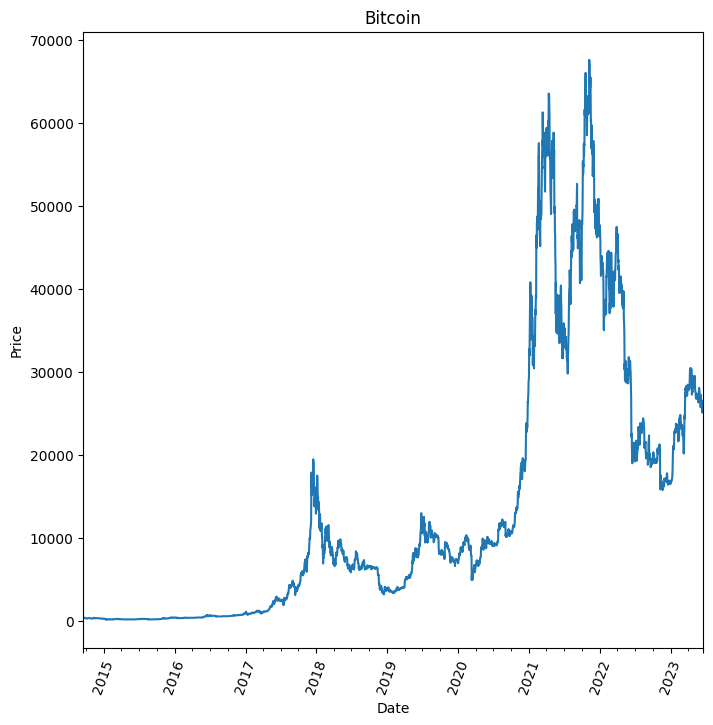

In [3]:
#import dataset
data = pd.read_csv('BTC-USD.csv')

# #drop missing data
data = data.dropna()

#Turn UTC time format into date type
data['Date'] = pd.to_datetime(data['Date'])

#Turn data into index
data.set_index('Date', drop = True, inplace =True)

#Plot the graph
plt.figure(figsize = (8,8))
data.Close.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin')
plt.xticks(rotation = 70)
plt.show()

Autocorrelation is used for determinate whether bitcoin price is stationary or nonstationary. <br> 
Due to the autocorrelation is remain nearly +1, bitcoin price is nonstationary time series <br> 

autocorrelation of +1 represents a perfect positive correlation (an increase seen in one time series leads to a proportionate increase in the other time series).

Therefore, bitcoin price contains trend and hereroskedasticity (error term variance is not constant)

<function matplotlib.pyplot.show(close=None, block=None)>

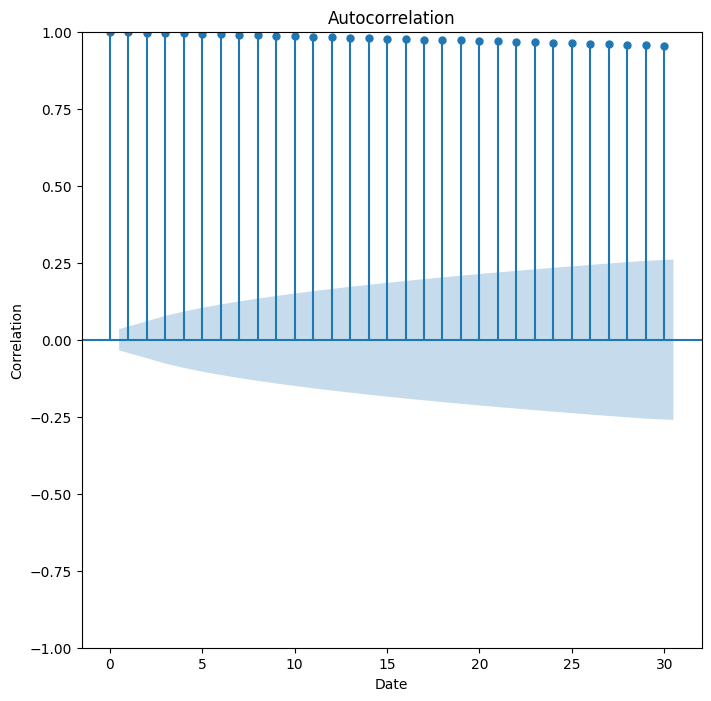

In [7]:
#Calculate the autocorrelation, 
fig, axes = plt.subplots(figsize = (8,8))
plot_acf(data.Close, axes, lags = 30)
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show

If we change bitcoin price into precentage, we can get stationary time series. Therefore, stationary time series is more predictable in bitcoin price

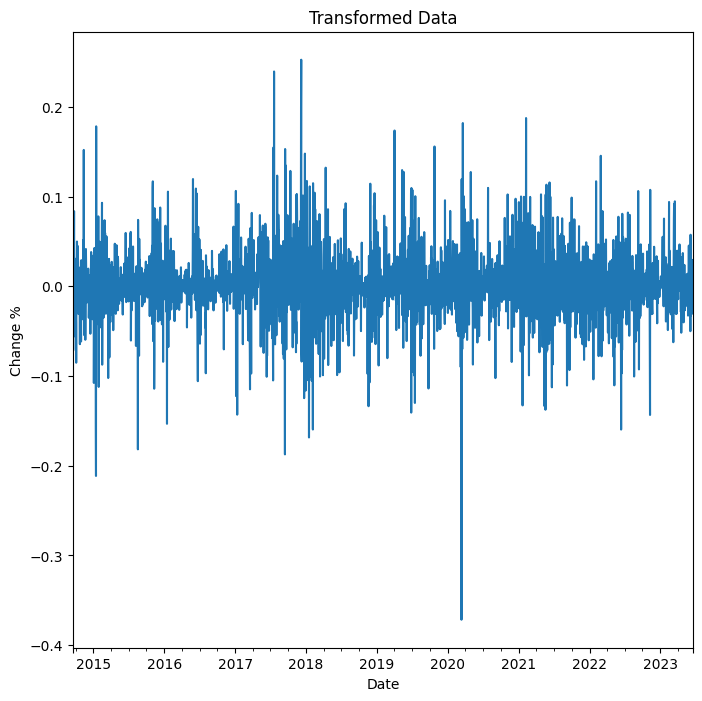

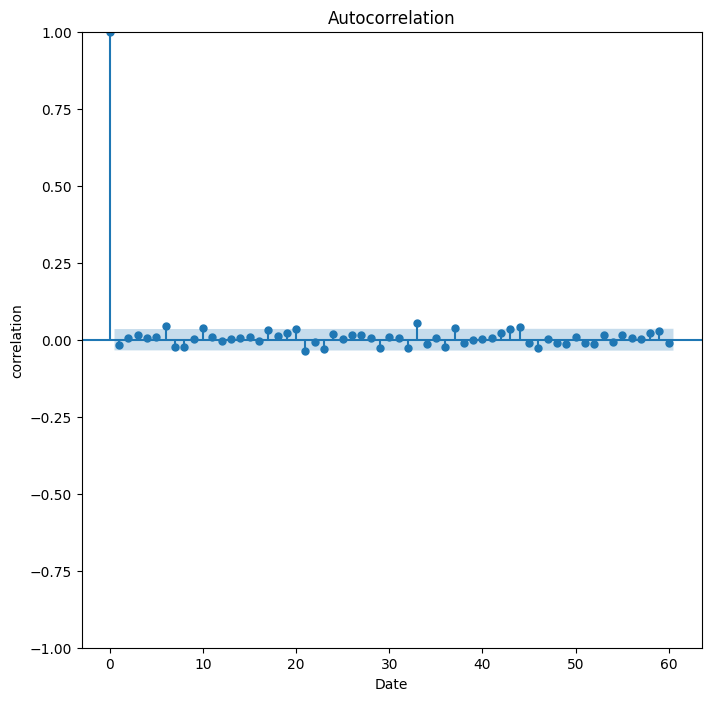

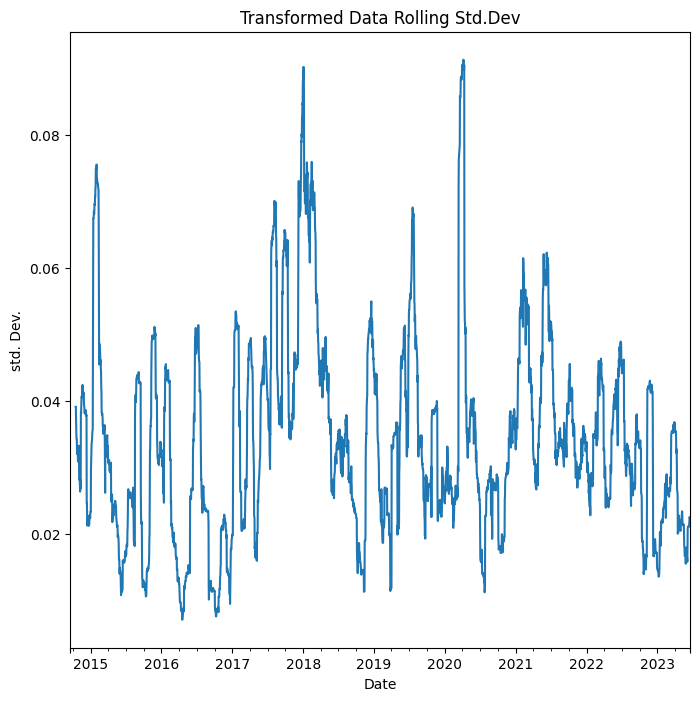

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Turn changes into percentage
data['diffs'] = (data.Close.diff() / data.Close.shift(periods = 1, fill_value = 0)).values
data['diffs'].fillna(0, inplace=True) # fill NaN values with 0

# convert masked elements to NaN values
data['diffs'] = np.ma.filled(data['diffs'], fill_value=np.nan)

#Plot graph
plt.figure(figsize = (8, 8))
data.diffs.plot()
plt.xlabel('Date')
plt.ylabel('Change %')
plt.title('Transformed Data')
plt.show()

#acf
fig, axes = plt.subplots(figsize = (8,8))
plot_acf(data.diffs, axes, lags=60)
plt.xlabel('Date')
plt.ylabel('correlation')
plt.show()

plt.figure(figsize = (8,8))
data.diffs.rolling(30).std().plot()
plt.xlabel('Date')
plt.ylabel('std. Dev.')
plt.title('Transformed Data Rolling Std.Dev')
plt.show()